In [2]:
#import libraries yg dibutuhkan
import pandas as pd #memanggil pandas sebagai pd
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns
from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler #mamanggil minmaxscaler dan StandardScaler dari sklearn processing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder #memanggil model encode onehotencoder,LabelEncoder,OrdinalEncoder dari sklearn processing
import pickle #memanggil pickle
from sklearn.metrics import classification_report, accuracy_score,  f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors
from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




# DATA LOADING

In [153]:
df = pd.read_csv("Fraud.csv")

In [154]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [155]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [157]:
df.shape

(6362620, 11)

In [158]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [159]:
df.isnull().any().any()

False

In [160]:
df.duplicated().sum()

0

In [161]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [162]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [163]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [164]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

# EDA

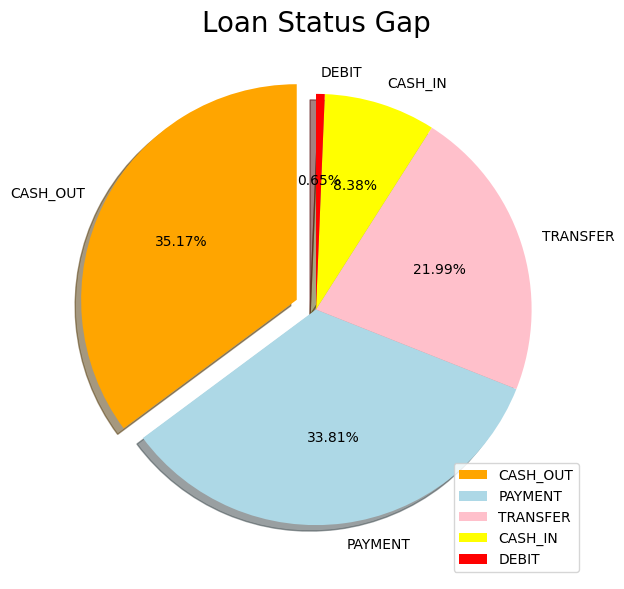

In [165]:
labels = ['CASH_OUT','PAYMENT','TRANSFER','CASH_IN','DEBIT']
size = df['type'].value_counts()
colors = ['orange', 'lightblue', 'pink', 'yellow', 'red']
explode = [0.1, 0, 0, 0, 0]

fig, axes = plt.subplots(figsize=(8, 7))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('', fontsize = 20)
plt.legend()
plt.show()

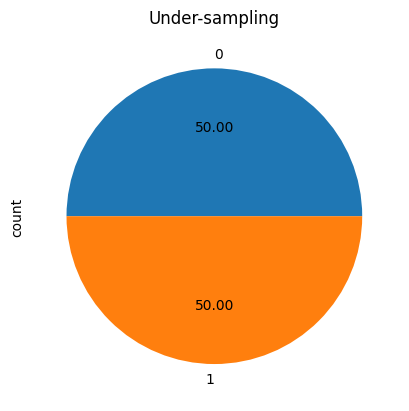

In [166]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)  # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_balanced, y_train_balanced = rus.fit_resample(df.drop(['isFraud'], axis=1), df['isFraud'])
ax = y_train_balanced.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [167]:
y_train_balanced.shape

(16426,)

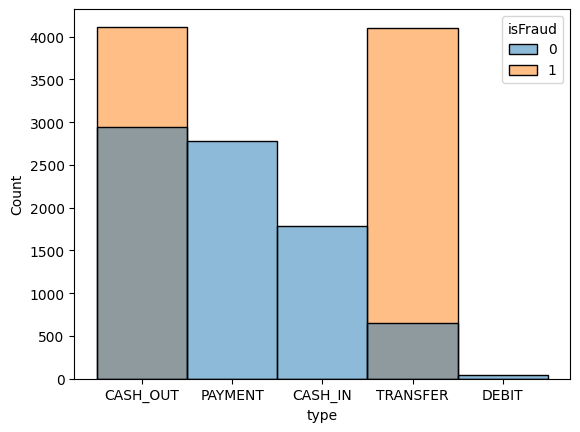

In [168]:
sns.histplot(x=X_train_balanced['type'], hue=y_train_balanced);

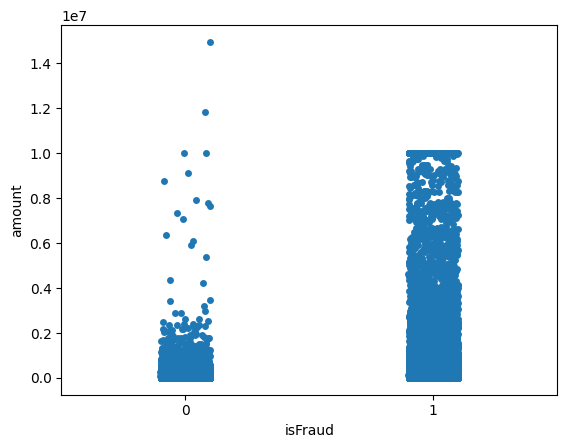

In [169]:
sns.stripplot(y=X_train_balanced['amount'], x=y_train_balanced);

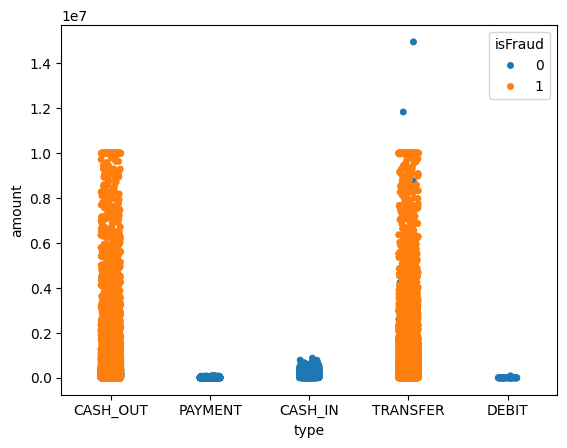

In [170]:
sns.stripplot(y=X_train_balanced['amount'], x=X_train_balanced['type'], hue=y_train_balanced);

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


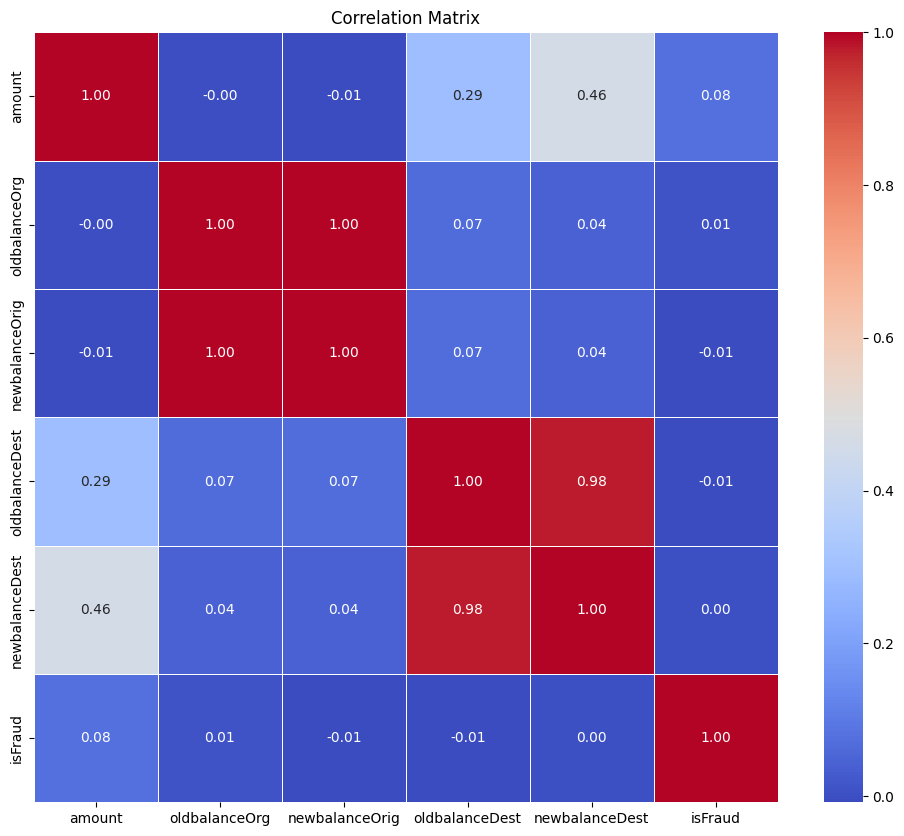

In [172]:
# list kolom yang akan diuji korelasinya
list = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
# mendefinisikan ukuran gambar
plt.figure(figsize=(12, 10))
# plot korelasi setiap variable menggunakan heatmap
sns.heatmap(df[list].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Memberikan judul
plt.title('Correlation Matrix')
# menampilkan correlation matrix
plt.show()

In [173]:
X_y_balanced = pd.concat([X_train_balanced, y_train_balanced], axis=1)

<Axes: xlabel='amount'>

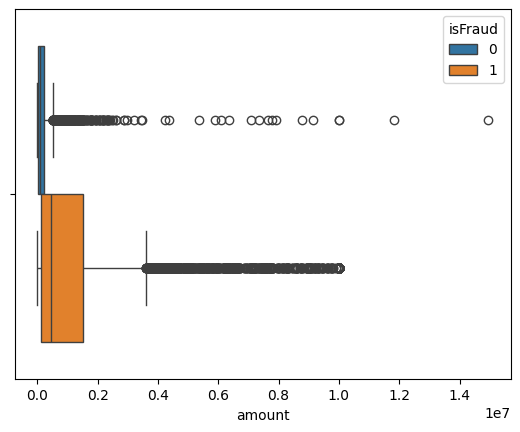

In [174]:
sns.boxplot(x=X_y_balanced['amount'], hue=X_y_balanced['isFraud'])

# Feature Engineering


In [175]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

cat_cols = (X_y_balanced.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, X_y_balanced[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,step,743
1,amount,12180
2,oldbalanceOrg,9407
3,newbalanceOrig,3685
4,oldbalanceDest,7512
5,newbalanceDest,9140
6,isFlaggedFraud,2
7,isFraud,2


In [176]:
X_y_balanced.drop(['isFlaggedFraud', 'nameOrig', 'nameDest','step'], axis=1, inplace=True)

**Split X(Features) and y (Target)**

In [177]:
#Splitting between 'X' and 'y'

X = X_y_balanced.drop(['isFraud'], axis = 1)
y = X_y_balanced['isFraud']
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3021630,CASH_OUT,167615.98,0.00,0.00,1006766.57,1174382.56
2926870,PAYMENT,12496.87,222502.10,210005.22,0.00,0.00
3534052,CASH_OUT,234742.36,0.00,0.00,1615033.59,1849775.94
3956170,PAYMENT,51711.31,250144.16,198432.85,0.00,0.00
581221,CASH_IN,217826.62,9272302.98,9490129.61,4852262.74,4634436.12
...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [178]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40, stratify=y)
print('x Train Size: ', X_train.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

x Train Size:  (13140, 6)
x Test Size:  (3286, 6)
y Train Size:  (13140,)
y Test Size:  (3286,)


**Handling Outlier**

In [179]:
num_cols = (X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,amount,3.630000
1,oldbalanceOrg,5.904348
2,newbalanceOrig,7.838386
3,oldbalanceDest,33.617092
4,newbalanceDest,25.299610


In [180]:
# First, capping the normal distribution

winsoriser_age = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=1,
                            variables=['newbalanceOrig'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [181]:
winsoriser2 = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['amount','oldbalanceOrg','oldbalanceDest',
                                       'newbalanceDest'],
                            missing_values='ignore')

X_train_capped = winsoriser2.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [182]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

amount - Before Capping


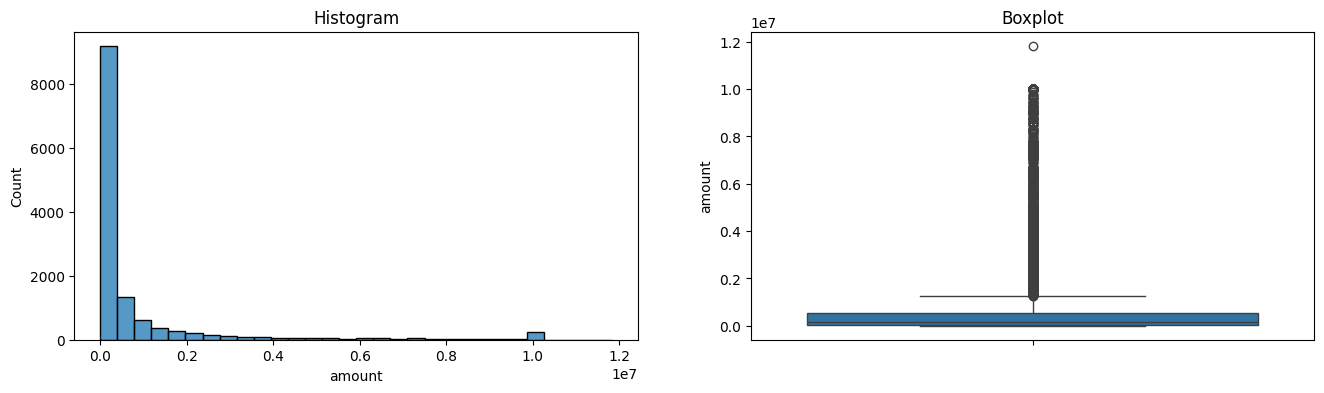


amount - After Capping


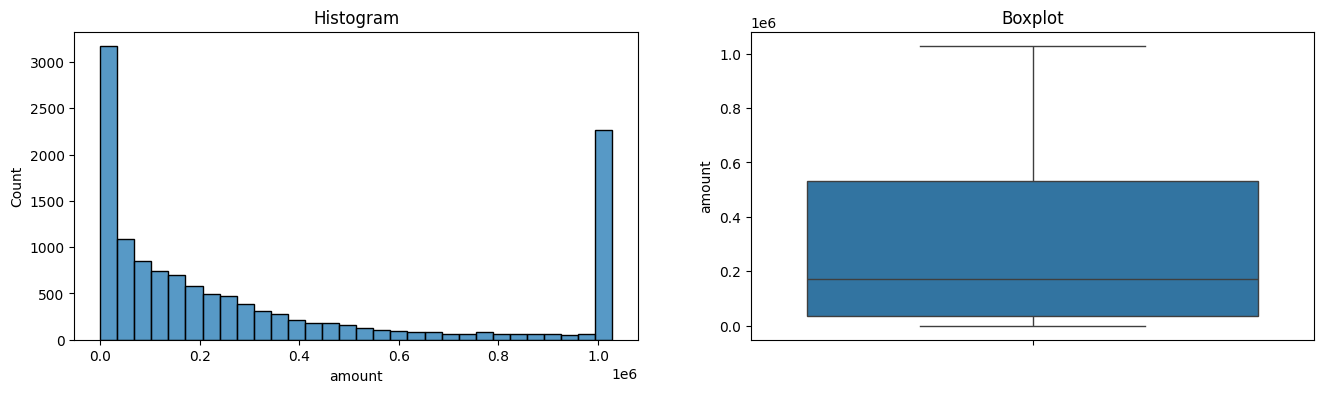

oldbalanceOrg - Before Capping


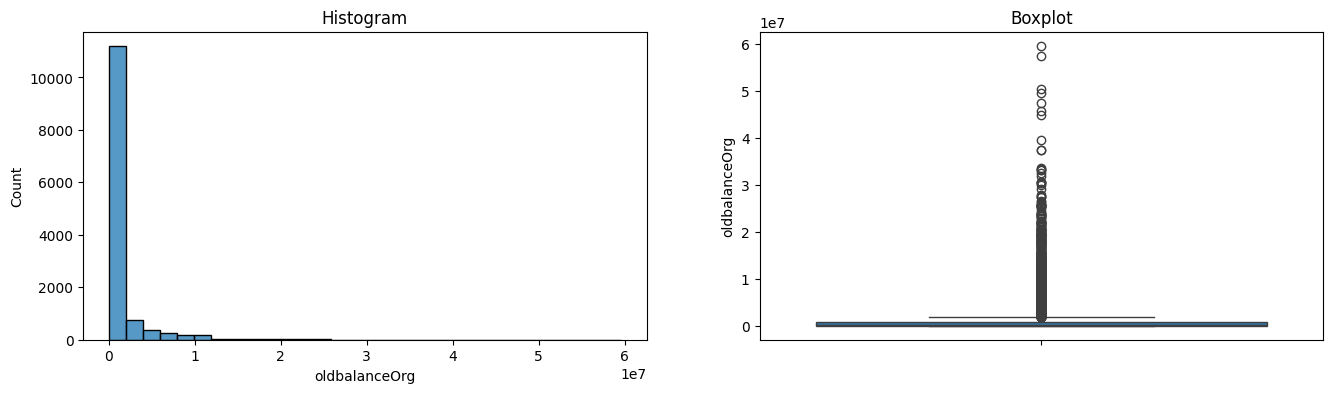


oldbalanceOrg - After Capping


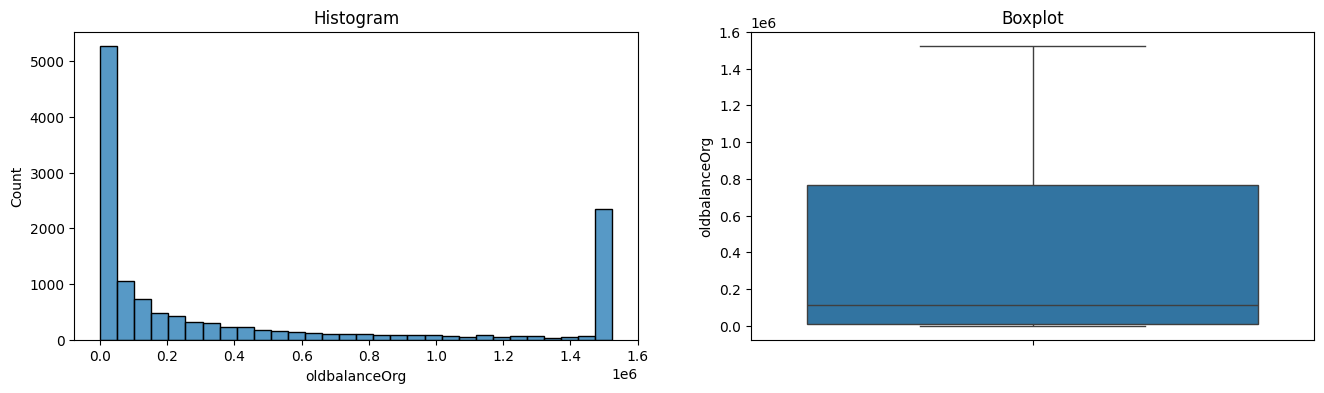

newbalanceOrig - Before Capping


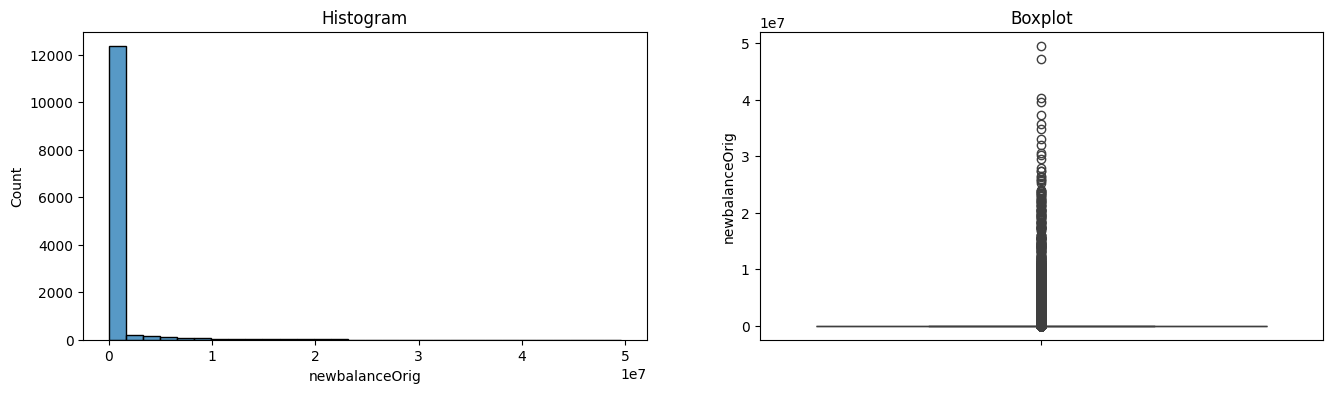


newbalanceOrig - After Capping


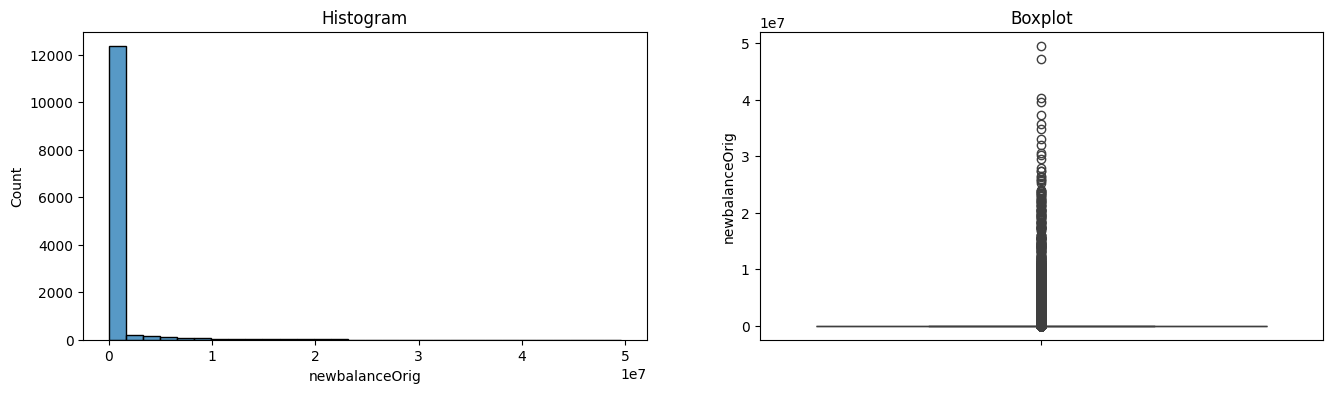

oldbalanceDest - Before Capping


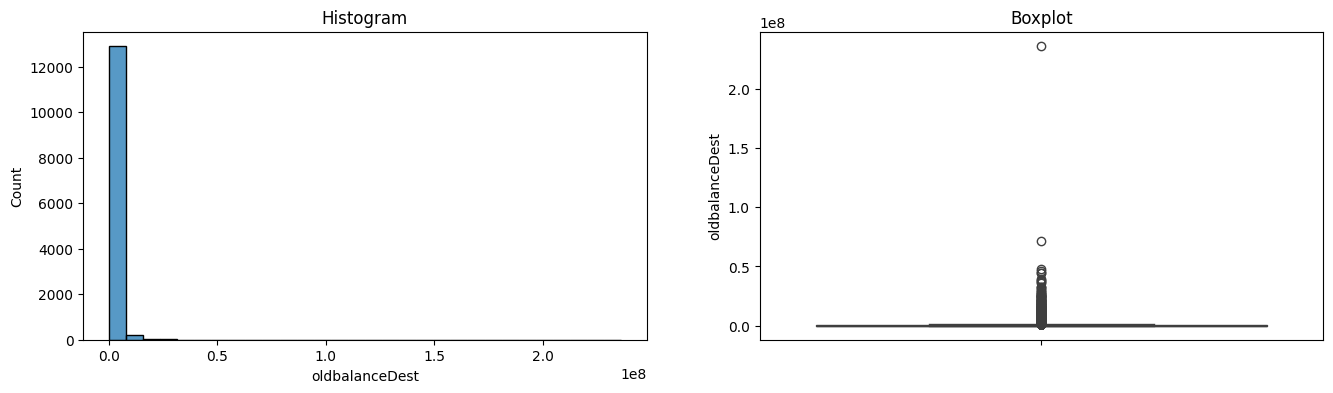


oldbalanceDest - After Capping


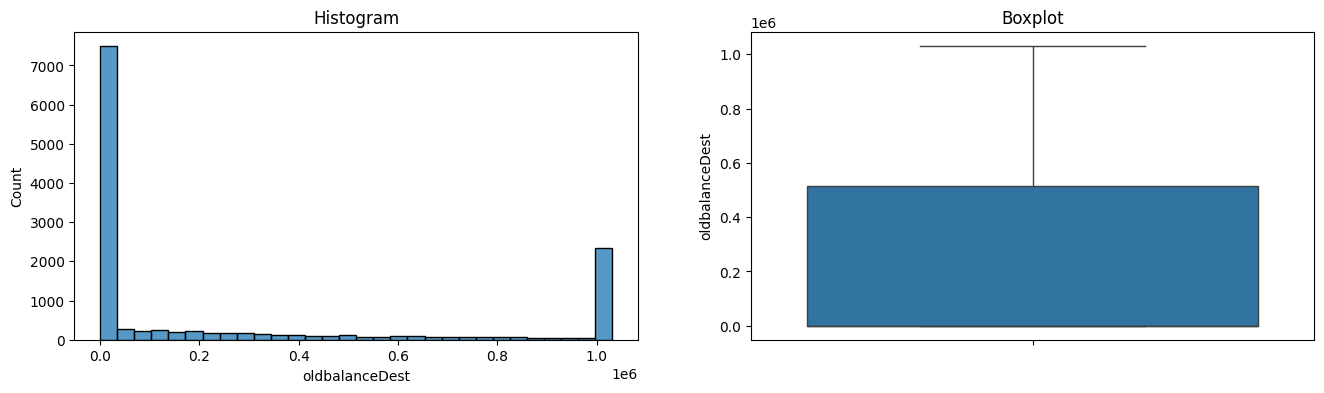

newbalanceDest - Before Capping


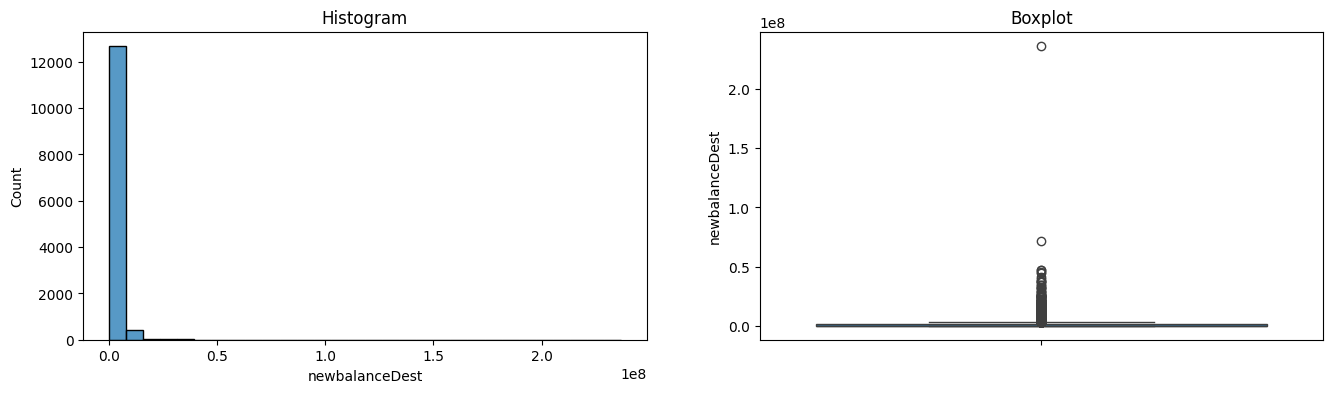


newbalanceDest - After Capping


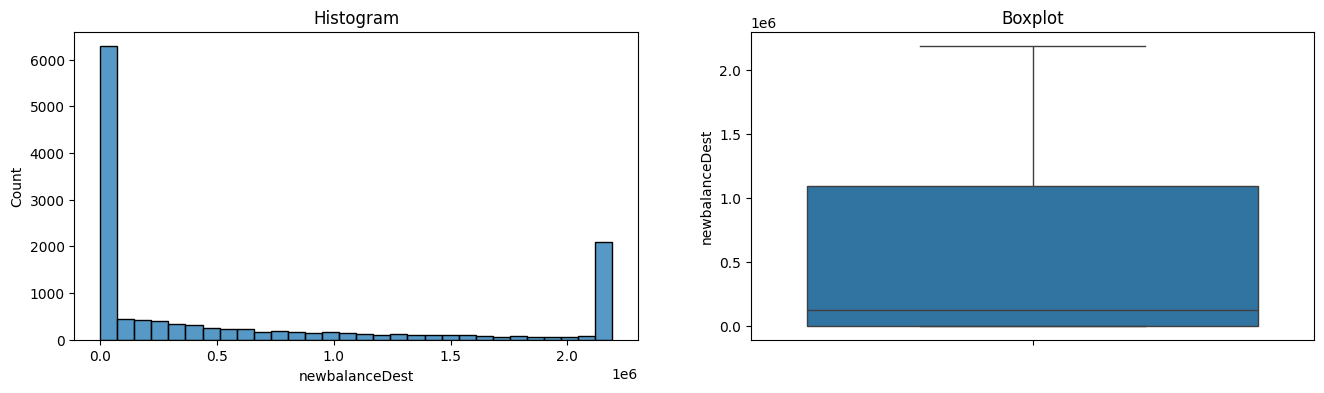

In [183]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

**Split Between Num Columns and Cat Columns**

In [184]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
Categorical Columns:  ['type']


In [185]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6201890,628697.26,628697.26,0.00,0.00,628697.26
1030538,479892.04,479892.04,0.00,1600079.29,2079971.33
2780720,2485467.28,2485467.28,0.00,0.00,2485467.28
5065874,20583.61,72794.00,52210.39,0.00,0.00
499609,16614.82,16614.82,0.00,0.00,0.00
...,...,...,...,...,...
6362566,8116.53,8116.53,0.00,0.00,0.00
6168683,316877.85,316877.85,0.00,0.00,0.00
5171585,361877.28,361877.28,0.00,0.00,0.00
5990636,426323.38,426323.38,0.00,0.00,0.00


In [186]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,amount,ada korelasi
1,oldbalanceOrg,ada korelasi
2,newbalanceOrig,ada korelasi
3,oldbalanceDest,ada korelasi
4,newbalanceDest,ga ada korelasi


In [187]:
X_train.drop(['newbalanceDest'], axis=1, inplace=True)

# Model

In [188]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [189]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object'))
])

#Making pipeline for LogReg
pipe_logreg = Pipeline([
('transformer', transformer),
('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))
])

#making pipeline for SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC(kernel='rbf', gamma=0.1))
])

#making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])

# Making pipeline for Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=pipe_logreg, n_estimators=10, random_state=42)
pipe_bagging = Pipeline([
    ('transformer', transformer),
    ('classifier', bagging_classifier)
])

# Making pipeline for AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=pipe_svm, n_estimators=50, random_state=42)
pipe_adaboost = Pipeline([
    ('transformer', transformer),
    ('classifier', adaboost_classifier)
])

# Making pipeline for SGDC Classifier
sgdc_classifier = SGDClassifier(loss='hinge', random_state=42)
pipe_sgdc = Pipeline([
    ('transformer', transformer),
    ('classifier', sgdc_classifier)
])

#### Logistic Classification

In [190]:
pipe_logreg.fit(X_train, y_train)
print('Training Score: ',round(pipe_logreg.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_logreg.score(X_test, y_test),4))

Training Score:  0.8704
Testing Score:  0.8771


In [191]:
y_logreg_pred = pipe_logreg.predict(X_test)
y_logreg_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [192]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_logreg,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.85434412 0.84965636 0.84215054 0.85201027 0.86379019]
F1 Score - Mean - Cross Validation :  0.8523902937978869
F1 Score - Std - Cross Validation  :  0.0070177835334822225
F1 Score - Range of Test-Set       :  0.8453725102644046 - 0.8594080773313691


In [193]:
print(classification_report(y_test, y_logreg_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1643
           1       0.97      0.78      0.86      1643

    accuracy                           0.88      3286
   macro avg       0.89      0.88      0.88      3286
weighted avg       0.89      0.88      0.88      3286



#### Support Vectore Machine Classification

In [194]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.8209
Testing Score:  0.8247


In [195]:
y_svm_pred = pipe_svm.predict(X_test)
y_svm_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [196]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_svm,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.77285319 0.76607642 0.7693019  0.77547257 0.79124886]
F1 Score - Mean - Cross Validation :  0.7749905861784587
F1 Score - Std - Cross Validation  :  0.00872875489896797
F1 Score - Range of Test-Set       :  0.7662618312794908 - 0.7837193410774267


In [197]:
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1643
           1       0.99      0.66      0.79      1643

    accuracy                           0.82      3286
   macro avg       0.87      0.82      0.82      3286
weighted avg       0.87      0.82      0.82      3286



#### K-Nearest Neighbors Classification

In [198]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.9708
Testing Score:  0.961


In [199]:
y_knn_pred = pipe_knn.predict(X_test)
y_knn_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [200]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.95058469 0.95858434 0.95418402 0.95743879 0.96416447]
F1 Score - Mean - Cross Validation :  0.9569912609088183
F1 Score - Std - Cross Validation  :  0.004541318378976424
F1 Score - Range of Test-Set       :  0.9524499425298418 - 0.9615325792877947


In [201]:

print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1643
           1       0.95      0.97      0.96      1643

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



#### SGDC Classifier

In [202]:
pipe_sgdc.fit(X_train, y_train)
print('Training Score: ',round(pipe_sgdc.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_sgdc.score(X_test, y_test),4))

Training Score:  0.853
Testing Score:  0.8576


In [203]:
y_sgdc_pred = pipe_sgdc.predict(X_test)
y_sgdc_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [204]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_sgdc,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.84809585 0.83690987 0.80463872 0.83722944 0.85150215]
F1 Score - Mean - Cross Validation :  0.8356752038418029
F1 Score - Std - Cross Validation  :  0.01656483135439779
F1 Score - Range of Test-Set       :  0.8191103724874051 - 0.8522400351962007


In [205]:
print(classification_report(y_test, y_sgdc_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1643
           1       0.98      0.73      0.84      1643

    accuracy                           0.86      3286
   macro avg       0.88      0.86      0.86      3286
weighted avg       0.88      0.86      0.86      3286



In [206]:
print('Logistic Regression')
print(classification_report(y_test, y_logreg_pred))
print ('---------------------------------------------')
print('Support Vectore Machine (SVM)')
print(classification_report(y_test, y_svm_pred))
print ('---------------------------------------------')
print('K-Nearest Neighbors (KNN)')
print(classification_report(y_test, y_knn_pred))
print ('---------------------------------------------')
print('SGDC Regression')
print(classification_report(y_test, y_sgdc_pred))
print ('---------------------------------------------')

Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1643
           1       0.97      0.78      0.86      1643

    accuracy                           0.88      3286
   macro avg       0.89      0.88      0.88      3286
weighted avg       0.89      0.88      0.88      3286

---------------------------------------------
Support Vectore Machine (SVM)
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1643
           1       0.99      0.66      0.79      1643

    accuracy                           0.82      3286
   macro avg       0.87      0.82      0.82      3286
weighted avg       0.87      0.82      0.82      3286

---------------------------------------------
K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1643
           1       0.95      0.97      0.96      1643

    accuracy  

#### Base Model Comparison

In [208]:
models = {
    'Logistic Regression' : pipe_logreg,
    'SVM' : pipe_svm,
    'KNN' : pipe_knn,
    'SGDC': pipe_sgdc,
    
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [209]:
df_model

,Logistic Regression,SVM,KNN,SGDC
Accuracy,0.877054,0.824711,0.961047,0.857578
F1-Score,0.863421,0.789011,0.961329,0.837387


In [214]:
models = {
    'Logistic Regression' : pipe_logreg,
    'SVM' : pipe_svm,
    'KNN' : pipe_knn,
    'SGDC': pipe_sgdc,
}

metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train, cv=5, scoring='f1').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train, cv=5, scoring='f1').std()
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

In [212]:
df_cross_val

,Logistic Regression,SVM,KNN,SGDC
Mean,0.835675,0.835675,0.835675,0.835675
Std,0.016565,0.016565,0.016565,0.016565


# Hyper Parameter Tuning

In [223]:


param_svm = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__C': [100, 1000, 10000],  
    'classifier__gamma': [0.1, 1, 10],  
}
param_knn = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_neighbors': [3, 5, 7], 
    'classifier__weights': ['uniform', 'distance'],  
}
param_logreg = {
    'transformer__scaler': [StandardScaler(),MinMaxScaler()],
    'classifier__C': [0.01, 0.1 , 1 , 10 , 100],  
    'classifier__solver': ['saga','lbfgs','newton-cg'],  
    'classifier__max_iter': [2000,3000,4000]
}

param_sgdc = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__loss': ['hinge', 'log', 'modified_huber'],
    'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__max_iter': [1000, 2000, 3000],
}

#### SGDC Hyper Parameter Tuning


In [226]:
grid_sgdc = GridSearchCV(pipe_sgdc, param_sgdc, cv=5).fit(X_train, y_train)  

C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mardhya\AppData\Roaming\Python\Pytho

#### SVM Hyper Parameter Tuning

In [216]:
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5).fit(X_train, y_train)  

#### Logistic Regression Hyper Parameter Tuning

In [217]:
grid_logreg = GridSearchCV(pipe_logreg, param_logreg, cv=5,error_score='raise').fit(X_train, y_train)

C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

#### KNN Hyper Paramter Tuning

In [218]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5).fit(X_train, y_train)

In [227]:
print('Model SVM')
print('Train Set Score : ', grid_svm.score(X_train, y_train))
print('Test Set Score : ', grid_svm.score(X_test, y_test))
print('Model Logreg')
print('Train Set Score : ', grid_logreg.score(X_train, y_train))
print('Test Set Score : ', grid_logreg.score(X_test, y_test))
print('Model KNN')
print('Train Set Score : ', grid_knn.score(X_train, y_train))
print('Test Set Score : ', grid_knn.score(X_test, y_test))
print('Model SGDC')
print('Train Set Score : ', grid_sgdc.score(X_train, y_train))
print('Test Set Score : ', grid_sgdc.score(X_test, y_test))

Model SVM
Train Set Score :  0.9829528158295282
Test Set Score :  0.970785149117468
Model Logreg
Train Set Score :  0.8939117199391172
Test Set Score :  0.8992696287279367
Model KNN
Train Set Score :  1.0
Test Set Score :  0.9689592209373098
Model SGDC
Train Set Score :  0.9149923896499239
Test Set Score :  0.9160073037127207


In [220]:
best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

{'classifier__C': 10000, 'classifier__gamma': 10, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C2A6A73BC0>)])),
                ('classifier', SVC(C=10000, gamma=10))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__gamma',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [221]:
best_param_logreg = grid_logreg.best_params_
print(best_param_logreg)
print('\n')
best_pipe_logreg = grid_logreg.best_estimator_
print(best_pipe_logreg)
print('\n')
result_df_logreg = pd.DataFrame.from_dict(grid_logreg.cv_results_, orient='columns')
print(result_df_logreg.columns)

{'classifier__C': 100, 'classifier__max_iter': 2000, 'classifier__solver': 'lbfgs', 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C30013ABD0>)])),
                ('classifier',
                 LogisticRegression(C=100, max_iter=2000,
                                    multi_class='multinomial'))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__max_iter',
       'param_classifier__solver', 'param_transformer__scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [222]:
best_param_knn = grid_knn.best_params_
print(best_param_knn)
print('\n')
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

{'classifier__n_neighbors': 3, 'classifier__weights': 'distance', 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C2CF0E1A60>)])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__n_neighbors', 'param_classifier__weights',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [228]:
best_param_sgdc = grid_sgdc.best_params_
print(best_param_sgdc)
print('\n')
best_pipe_sgdc = grid_sgdc.best_estimator_
print(best_pipe_sgdc)
print('\n')
result_df_sgdc = pd.DataFrame.from_dict(grid_sgdc.cv_results_, orient='columns')
print(result_df_sgdc.columns)

{'classifier__alpha': 0.0001, 'classifier__loss': 'modified_huber', 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C2A6B72990>)])),
                ('classifier',
                 SGDClassifier(loss='modified_huber', penalty='l1',
                               random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__alpha', 'param_classifier__loss',
       'param_classifier__max_iter', 'param_classifier__penalty',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_sc

#### Model After Tuning Comparison

In [229]:
models = {
    'Logistic Regression' :best_pipe_logreg,
    'SVM' : best_pipe_svm,
    'KNN' :best_pipe_knn,
    'SGDC': best_pipe_sgdc
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [232]:
df_model

,Logistic Regression,SVM,KNN,SGDC
Accuracy,0.877054,0.824711,0.961047,0.857578
F1-Score,0.863421,0.789011,0.961329,0.837387


In [231]:
model_tuning

,Logistic Regression,SVM,KNN,SGDC
Accuracy,0.89927,0.970785,0.968959,0.916007
F1-Score,0.893122,0.970838,0.969166,0.916109


**Model SVM**

In [233]:
best_pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C2A6A73BC0>)])),
                ('classifier', SVC(C=10000, gamma=10))])

**Model Logistic Regression**

In [234]:
best_pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C30013ABD0>)])),
                ('classifier',
                 LogisticRegression(C=100, max_iter=2000,
                                    multi_class='multinomial'))])

**Model KNN**

In [235]:
best_pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C2CF0E1A60>)])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

**Model SGDC**

In [236]:
best_pipe_sgdc.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C2A6B72990>)])),
                ('classifier',
                 SGDClassifier(loss='modified_huber', penalty='l1',
                               random_state=42))])

# Saving Model

In [1]:
import pickle
import json

pickle.dump(best_pipe_svm, open('model_svm.pkl', 'wb'))
json.dump(num_columns, open('list_num_cols.txt', 'w'))
json.dump(cat_columns, open('list_cat_cols.txt', 'w'))



# Model Inference

In [4]:
with open('list_num_cols.txt', 'r') as file_1:
  list_num_cols = json.load(file_1)
with open('list_cat_cols.txt', 'r') as file_2:
  list_cat_cols = json.load(file_2)
with open('model_svm.pkl', 'rb') as file_3:
    model_svm = pickle.load(file_3)

In [5]:
#menggunakan dummy data untuk mengukur ketepatan prediksi price

data_inf = pd.DataFrame({
    'step' : [743],
    'type':['CASH_OUT'],
    'amount' : [339682.13], 
    'nameOrig' : ['C786484425'],
    'oldbalanceOrg' : [339682.13],
    'newbalanceOrig':[0.0], 
    'nameDest' : ['C776919290'], 
    'oldbalanceDest':[0.0],
    'newbalanceDest' : [339682.13],
})

# Melakukan prediksi menggunakan model yang telah dimuat
predictions = model_svm.predict(data_inf)

# Menampilkan hasil prediksi dengan pernyataan yang lebih informatif
if predictions[0] == 0:
    print("Transaction Clean.")
else:
    print("Fraud Transaction Detected!")

Fraud Transaction Detected!
